The Consumer Complaint Database is a collection of complaints about consumer financial products and services that we sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first. Complaints referred to other regulators, such as complaints about depository institutions with less than $10 billion in assets, are not published in the Consumer Complaint Database. The database generally updates daily.

In [1]:
# Read in data from pandas
import pandas as pd

# This is used for fast string concatination
from io import StringIO

# Use nltk for valid words
import nltk
# Need to make hash 'dictionaries' from nltk for fast processing
import collections as co


import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

df = pd.read_csv('/Users/omaral-shammary/Downloads/complaints.csv')
# Only interested in data with consumer complaints
df=df[df['Consumer complaint narrative'].notnull()]

In [2]:
df = df.sample(n=100000)
len(df)

100000

In [3]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [4]:
# We want a very fast way to concat strings.
#  Try += if you don't believe this method is faster.
s=StringIO()
df['Consumer complaint narrative'].apply(lambda x: s.write(x))

k=s.getvalue()
s.close()
k=k.lower()
k=k.split()

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/omaral-
[nltk_data]     shammary/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Next only want valid strings
words = co.Counter(nltk.corpus.words.words())
stopWords =co.Counter( nltk.corpus.stopwords.words() )
k=[i for i in k if i in words and i not in stopWords]
s=" ".join(k)
c = co.Counter(k)

In [7]:
c.most_common(14)

[('credit', 166483),
 ('account', 116496),
 ('information', 65389),
 ('report', 55450),
 ('payment', 46097),
 ('received', 40302),
 ('loan', 39527),
 ('told', 39198),
 ('bank', 38402),
 ('debt', 37764),
 ('consumer', 37133),
 ('company', 33023),
 ('card', 31358),
 ('letter', 28811)]

In [8]:
import sys
print(sys.executable)

/Users/omaral-shammary/opt/anaconda3/bin/python


In [ ]:
# pip install wordcloud

In [9]:
from wordcloud import WordCloud

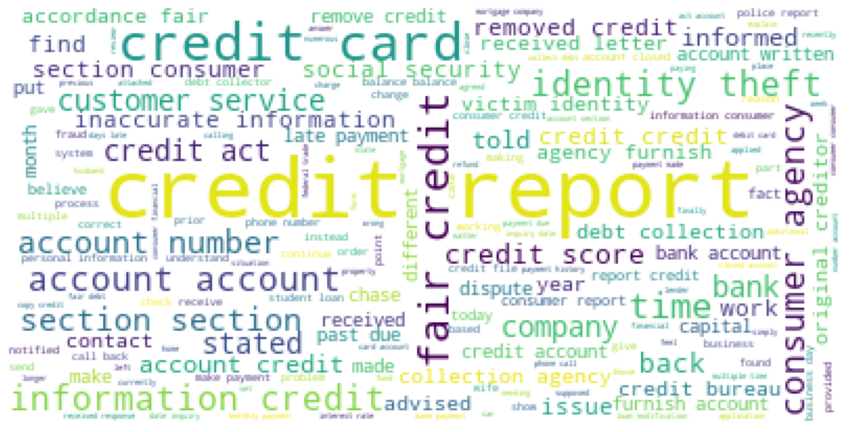

In [14]:
from wordcloud import WordCloud

# Read the whole text.
text = s

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt


# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(k),max_font_size=40, relative_scaling=.8).generate(text)
fig = plt.figure(figsize = (15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();